In [75]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data)
ride_df = pd.read_csv(ride_data)
# print(city_df.head())
# print(ride_df.head())
# Combine the data into a single dataset
full_df= ride_df.merge(city_df)
# Display the data table for preview
full_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


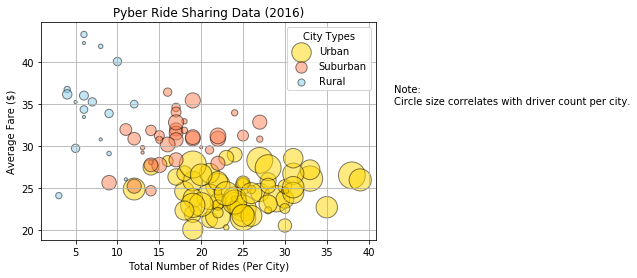

In [76]:
# Obtain the x and y coordinates for each of the three city types
urban_df = full_df.loc[full_df["type"] == "Urban"]
rural_df = full_df.loc[full_df["type"] == "Rural"]
burbs_df = full_df.loc[full_df["type"] == "Suburban"]

urban_driver_count = city_df.loc[city_df["type"] == "Urban"]
rural_driver_count = city_df.loc[city_df["type"] == "Rural"]
burbs_driver_count = city_df.loc[city_df["type"] == "Suburban"]

urban_means = (urban_df.groupby(urban_df["city"])).mean()
rural_means = (rural_df.groupby(rural_df["city"])).mean()
burbs_means = (burbs_df.groupby(burbs_df["city"])).mean()

urban_x = (urban_df.groupby(urban_df["city"])).count()
rural_x = (rural_df.groupby(rural_df["city"])).count()
burbs_x = (burbs_df.groupby(burbs_df["city"])).count()

# Build the scatter plots for each city types
plt.scatter(urban_x["fare"], urban_means["fare"], marker="o", facecolors="Gold", edgecolors="black", s=urban_driver_count["driver_count"]*10, alpha=0.5)
plt.scatter(burbs_x["fare"], burbs_means["fare"], marker="o", facecolors="Coral", edgecolors="black", s=burbs_driver_count["driver_count"]*10, alpha=0.5)
plt.scatter(rural_x["fare"], rural_means["fare"], marker="o", facecolors="SkyBlue", edgecolors="black", s=rural_driver_count["driver_count"]*10, alpha=0.5)

# Incorporate the other graph properties
plt.grid()
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Create a legend
plt.legend(["Urban","Suburban","Rural"], title="City Types")

# Incorporate a text label regarding circle size
plt.text(43,35,"Note:\nCircle size correlates with driver count per city.")

# Save Figure
plt.savefig("Images/Pyber_Ride_Sharing_Data_2016.png")

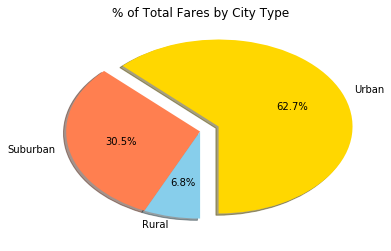

In [77]:
fig, ax = plt.subplots()

labels = ["Urban","Suburban","Rural"]

sizes = [urban_df["fare"].sum(),burbs_df["fare"].sum(),rural_df["fare"].sum()]

colors = ["gold", "coral", "skyblue"]

explode = (0.15, 0, 0)

plt.title("% of Total Fares by City Type")
ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=270)
ax.set_aspect("auto")

plt.savefig("Images/Pyber_Fares_by_City_Type_2016")
plt.show()

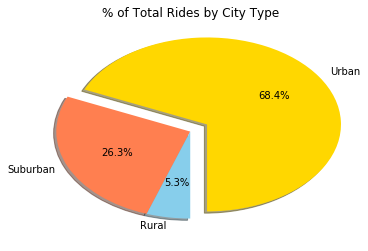

In [78]:
fig, ax = plt.subplots()

labels = ["Urban","Suburban","Rural"]

sizes = [urban_df["fare"].count(),burbs_df["fare"].count(),rural_df["fare"].count()]

colors = ["gold", "coral", "skyblue"]

explode = (0.15, 0, 0)

plt.title("% of Total Rides by City Type")
ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=270)
ax.set_aspect("auto")

plt.savefig("Images/Pyber_Rides_by_City_Type_2016")
plt.show()

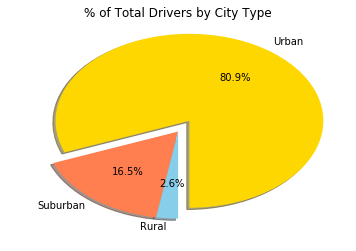

In [79]:
fig, ax = plt.subplots()

labels = ["Urban","Suburban","Rural"]

sizes = [urban_driver_count["driver_count"].sum(),burbs_driver_count["driver_count"].sum(),rural_driver_count["driver_count"].sum()]

colors = ["gold", "coral", "skyblue"]

explode = (0.15, 0, 0)

plt.title("% of Total Drivers by City Type")
ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=270)
ax.set_aspect("auto")
plt.savefig("Images/Pyber_Drivers_by_City_Type_2016")
plt.show()

In [ ]:
# The three observable trends I observed are:
#     1. In rural areas, there are fewer rides, and fewer drivers, however the average fare is significantly 
#     higher than other regions.  There are likely a lot of other factors that go into this fact - it could be
#     caused by surge pricing, or longer distances travelled.
#     2. Even though suburban drivers make up a smaller share of the total drivers, they account for a larger
#     porportion of fares when compared the urban drivers.
#     3. A higher frequency of rides in urban areas allows costs to stay low.  Other factors that should be
#     evaluated are the average length of the rides, and frequency of surge pricing.